# PD model

## How to maintenance a PD model for coming new inputs

## Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Import data

In [214]:
inputs_train = pd.read_csv('inputs_train.csv', index_col=0)
targets_train = pd.read_csv('targets_train.csv', index_col=0)
inputs_test = pd.read_csv('inputs_test.csv', index_col=0)
targets_test = pd.read_csv('targets_test.csv', index_col=0)

In [8]:
data_backup = pd.read_csv('credit_risk_dataset.csv')

In [9]:
credit_data = data_backup.copy()

## Population Stability Index (PSI)

New data (actual) are required to come sooner than existing data (expected).

$$\text{PSI} = \sum_{j=1}^{k}\left[(\% \text{actual}_j - \% \text{expected}_j) \ \ln \left(\frac{\% \text{actual}_j}{\% \text{expected}_j}\right)\right]$$

### For now, we treat the original data as new data as a simple illustration. We will split 10% of the original data from different random seed.

In [10]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [11]:
credit_data.shape

(32581, 12)

In [12]:
credit_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [14]:
credit_data['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [15]:
credit_data['person_emp_length'].fillna(0, inplace=True)

In [16]:
credit_data['person_emp_length'].isnull().sum()

0

In [17]:
credit_data['loan_int_rate'].mean()

11.01169489224439

In [18]:
credit_data['loan_int_rate'].fillna(credit_data['loan_int_rate'].mean(), inplace=True)

In [19]:
credit_data['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

credit_data['cb_person_default_on_file_int'] = np.where(credit_data['cb_person_default_on_file'] == 'Y', 1, 0)

credit_data['cb_person_default_on_file_int'].head()

In [20]:
credit_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [21]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [22]:
credit_data['loan_status'].unique()

array([1, 0], dtype=int64)

### continuous variables: 
'person_age', 

'person_income', 

'person_emp_length', 

'loan_amnt', 

'loan_int_rate', 

'loan_percent_income', 

'cb_person_cred_hist_length'

### discrete variables: 
'person_home_ownership', 

'loan_grade', 

'loan_intent', 

'cb_person_default_on_file'

### target variable: 
'loan_status'

In [23]:
credit_data['person_age'].describe()

count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

(array([4.877e+03, 7.438e+03, 7.652e+03, 3.541e+03, 3.422e+03, 1.565e+03,
        1.646e+03, 6.750e+02, 7.000e+02, 3.050e+02, 2.960e+02, 1.240e+02,
        1.270e+02, 5.400e+01, 5.000e+01, 2.400e+01, 3.100e+01, 1.000e+01,
        1.900e+01, 5.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([ 20.  ,  22.48,  24.96,  27.44,  29.92,  32.4 ,  34.88,  37.36,
         39.84,  42.32,  44.8 ,  47.28,  49.76,  52.24,  54.72,  57.2 ,
         59.68,  62.16,  64.64,  67.12,  69.6 ,  72.08,  74.56,  77.04,
         79.52,  82.  ,  84.48,  86.96,  89.44,  91.92,  94.4 ,  96.88,
         99.36, 101.84, 104.32, 106.8 , 109.28, 111.76, 114.24, 116.72,
        119.2 , 

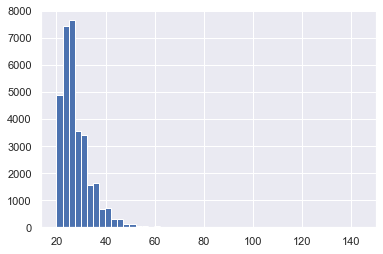

In [24]:
plt.hist(x='person_age', data=credit_data, bins=50)

In [25]:
(credit_data['person_age'] > 120).sum()

5

In [26]:
credit_data = credit_data[credit_data['person_age']<120]

In [27]:
credit_data['person_income'].describe()

count    3.257600e+04
mean     6.588214e+04
std      5.253499e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      2.039784e+06
Name: person_income, dtype: float64

In [28]:
credit_data['person_emp_length'].describe()

count    32576.000000
mean         4.657938
std          4.159740
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [29]:
credit_data['loan_amnt'].describe()

count    32576.000000
mean      9589.117755
std       6321.886846
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [30]:
credit_data['loan_int_rate'].describe()

count    32576.000000
mean        11.011561
std          3.081787
min          5.420000
25%          8.490000
50%         11.011695
75%         13.110000
max         23.220000
Name: loan_int_rate, dtype: float64

In [31]:
credit_data['loan_percent_income'].describe()

count    32576.000000
mean         0.170212
std          0.106778
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [32]:
credit_data['cb_person_cred_hist_length'].describe()

count    32576.000000
mean         5.803966
std          4.053791
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

### create dummy varialbes for discrete variables:

In [33]:
credit_data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [34]:
credit_data['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [35]:
credit_data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [36]:
dummies = [
    pd.get_dummies(credit_data['person_home_ownership'], prefix='person_home_ownership', prefix_sep=':'),
    pd.get_dummies(credit_data['loan_grade'], prefix='loan_grade', prefix_sep=':'), 
    pd.get_dummies(credit_data['cb_person_default_on_file'], prefix='cb_person_default_on_file', prefix_sep=':'),
    pd.get_dummies(credit_data['loan_intent'], prefix='loan_intent', prefix_sep=':')
]

In [37]:
dummies = pd.concat(dummies, axis=1)

In [38]:
type(dummies)

pandas.core.frame.DataFrame

credit_data['cb_person_default_on_file:Y'] = credit_data['cb_person_default_on_file_int']

credit_data['cb_person_default_on_file:N'] = 1 - credit_data['cb_person_default_on_file:Y'] 

In [39]:
credit_data = pd.concat([credit_data, dummies], axis=1)

In [40]:
type(credit_data)

pandas.core.frame.DataFrame

In [41]:
credit_data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,0,0,0,1,0,0,0,0,1,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,0,1,0,0,1,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,0,1,0,0,0,0,1,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0,0,1,0,0,0,0,1,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0,0,0,1,0,0,0,1,0,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,0,0,1,0,0,0,0,0,0,1
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,...,0,0,1,0,0,1,0,0,0,0
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,...,0,0,1,0,0,0,0,1,0,0
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,...,0,0,1,0,0,0,0,0,1,0
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,...,0,0,1,0,0,0,0,0,0,1


In [42]:
credit_data['loan_status'].sum() / credit_data.shape[0]

0.2181974459724951

We guess 'loan_status' = 1 means that the loan is defaulted.

After some examination below. We deduct that our guess is true. So we change the dependent variable to 'good_bad' having 1 representing a non-default (good) situation.

In [43]:
credit_data['good_bad'] = 1 - credit_data['loan_status']

In [44]:
credit_data['good_bad'].sum() / credit_data.shape[0]

0.7818025540275049

## Splitting data to take illustrative samples

In [129]:
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop('good_bad', axis=1), credit_data['good_bad'], test_size=0.1, random_state=101)

In [130]:
X_train.shape

(29318, 31)

In [131]:
y_train.shape

(29318,)

In [132]:
X_test.shape

(3258, 31)

In [133]:
y_test.shape

(3258,)

# Take illustrative samples

In [134]:
#X_prep = X_train
#y_prep = y_train
X_prep = X_test
y_prep = y_test

# Automatic WoE and IV calculator

In [135]:
def woe_discrete(df, var_name, df_target):
    df = pd.concat([df[var_name], df_target],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [136]:
def woe_continuous(df, var_name, df_target):
    df = pd.concat([df[var_name], df_target],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

# WoE Plotter

In [137]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

# classing discrete variables

In [138]:
X_prep['person_home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [139]:
df = woe_discrete(X_prep, 'person_home_ownership', y_prep)

In [140]:
df

,person_home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,1638,0.666056,0.502762,1091.0,547.0,0.429528,0.761838,-0.573049,NaN,NaN,0.506084
1,OTHER,15,0.666667,0.004604,10.0,5.0,0.003937,0.006964,-0.570303,0.000611,0.002746,0.506084
2,MORTGAGE,1330,0.889474,0.408226,1183.0,147.0,0.465748,0.204735,0.821926,0.222807,1.392229,0.506084
3,OWN,275,0.930909,0.084408,256.0,19.0,0.100787,0.026462,1.337289,0.041435,0.515362,0.506084


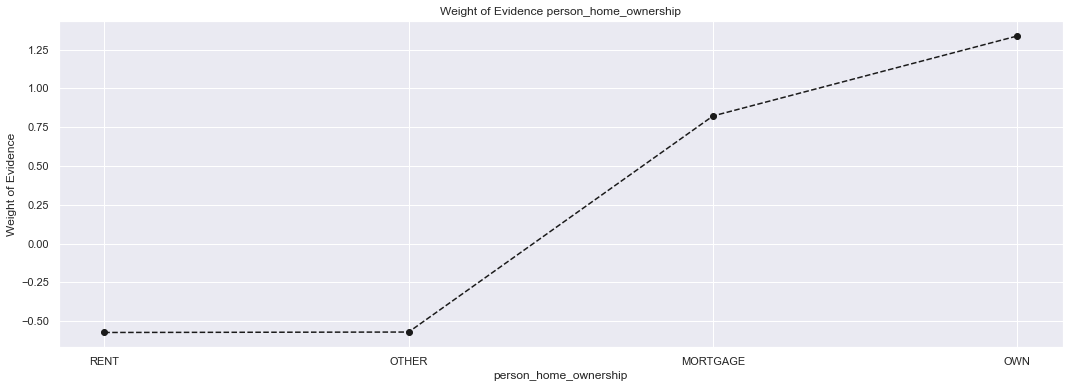

In [141]:
plot_by_woe(df)

In [142]:
# 'person_home_ownership:OWN', 'person_home_ownership:MORGAGE', 'person_home_ownership:OTHER_RENT'

X_prep['person_home_ownership:OTHER_RENT'] = sum([X_prep['person_home_ownership:OTHER'], X_prep['person_home_ownership:RENT']])

In [143]:
df= woe_discrete(X_prep,'cb_person_default_on_file',y_prep)

In [144]:
df

,cb_person_default_on_file,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Y,571,0.607706,0.175261,347.0,224.0,0.136614,0.311978,-0.825771,NaN,NaN,0.184625
1,N,2687,0.816152,0.824739,2193.0,494.0,0.863386,0.688022,0.227040,0.208446,1.052812,0.184625


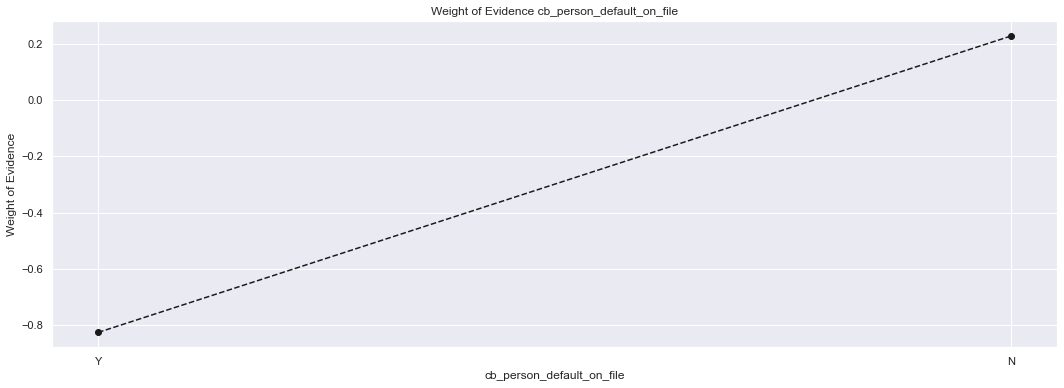

In [145]:
plot_by_woe(df)

In [146]:
# 'cb_person_default_on_file:Y', 'cb_person_default_on_file:N'

In [147]:
X_prep['loan_grade'].unique()

array(['A', 'E', 'B', 'C', 'D', 'F', 'G'], dtype=object)

In [148]:
df = woe_discrete(X_prep, 'loan_grade', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [149]:
df

,loan_grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,5,0.000000,0.001535,0.0,5.0,0.000000,0.006964,-inf,NaN,NaN,inf
1,F,33,0.333333,0.010129,11.0,22.0,0.004331,0.030641,-1.956597,0.333333,inf,inf
2,E,101,0.386139,0.031001,39.0,62.0,0.015354,0.086351,-1.727023,0.052805,0.229574,inf
3,D,387,0.395349,0.118785,153.0,234.0,0.060236,0.325905,-1.688333,0.009210,0.038690,inf
4,C,656,0.795732,0.201351,522.0,134.0,0.205512,0.186630,0.096378,0.400383,1.784711,inf
5,B,1030,0.833981,0.316145,859.0,171.0,0.338189,0.238162,0.350656,0.038249,0.254278,inf
6,A,1046,0.913958,0.321056,956.0,90.0,0.376378,0.125348,1.099498,0.079977,0.748843,inf


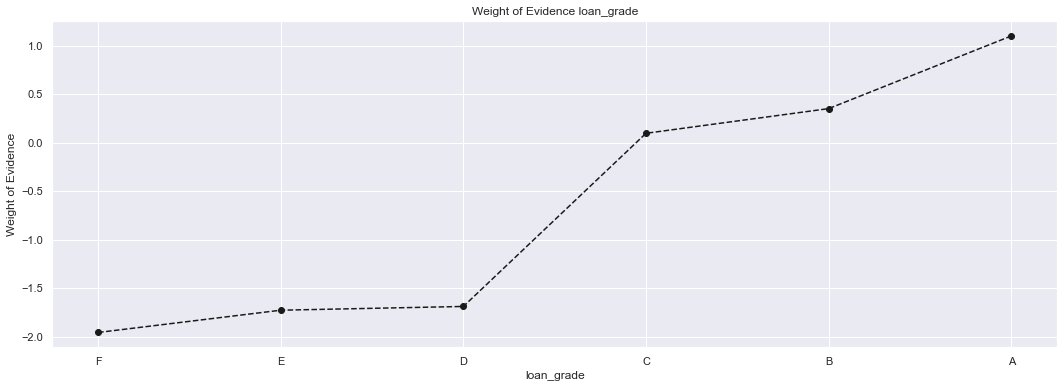

In [150]:
plot_by_woe(df)

In [151]:
# 'loan_grade:A',  'loan_grade:B', 'loan_grade:C', 'loan_grade:D', 'loan_grade:E', 'loan_grade:F', 'loan_grade:G',

In [152]:
X_prep['loan_intent'].unique()

array(['VENTURE', 'MEDICAL', 'PERSONAL', 'EDUCATION', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [153]:
df = woe_discrete(X_prep, 'loan_intent', y_prep)

In [154]:
df

,loan_intent,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,DEBTCONSOLIDATION,545,0.699083,0.167281,381.0,164.0,0.150000,0.228412,-0.420517,NaN,NaN,0.088431
1,MEDICAL,573,0.731239,0.175875,419.0,154.0,0.164961,0.214485,-0.262531,0.032157,0.157985,0.088431
2,HOMEIMPROVEMENT,336,0.758929,0.103131,255.0,81.0,0.100394,0.112813,-0.116635,0.027689,0.145896,0.088431
3,PERSONAL,535,0.807477,0.164211,432.0,103.0,0.170079,0.143454,0.170247,0.048548,0.286882,0.088431
4,VENTURE,615,0.829268,0.188766,510.0,105.0,0.200787,0.146240,0.317001,0.021792,0.146754,0.088431
5,EDUCATION,654,0.830275,0.200737,543.0,111.0,0.213780,0.154596,0.324129,0.001007,0.007129,0.088431


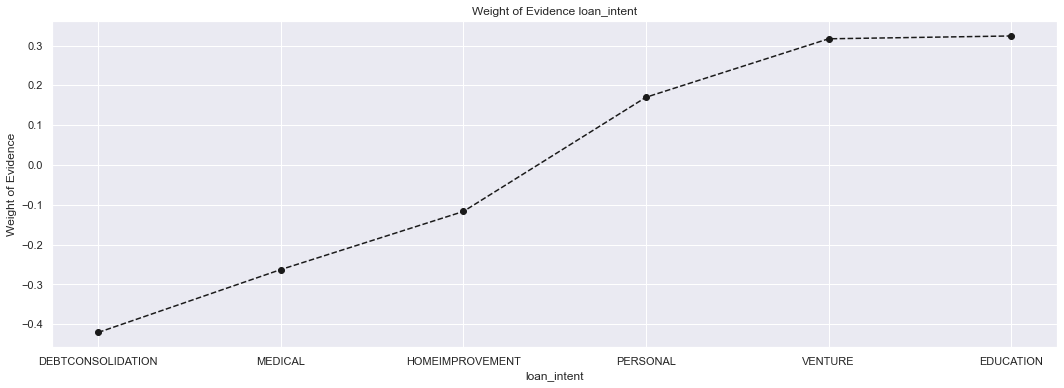

In [155]:
plot_by_woe(df)

In [156]:
# 'loan_intent:DEBTCONSOLIDATION', 'loan_intent:EDUCATION', 'loan_intent:HOMEIMPROVEMENT', 'loan_intent:MEDICAL', 'loan_intent:PERSONAL', 'loan_intent:VENTURE'

# Classing continuous variables

'person_age'

In [157]:
X_prep['person_age'].unique()

array([22, 26, 27, 21, 24, 41, 29, 25, 28, 23, 62, 35, 32, 30, 69, 31, 36,
       33, 53, 39, 44, 49, 34, 43, 37, 47, 40, 38, 48, 42, 46, 60, 56, 20,
       45, 61, 58, 50, 64, 55, 65, 54, 51, 52, 57, 84, 76], dtype=int64)

In [158]:
df = woe_continuous(X_prep, 'person_age', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [159]:
df

,person_age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,20,1,1.000000,0.000307,1.0,0.0,0.000394,0.000000,inf,NaN,NaN,inf
1,21,120,0.700000,0.036832,84.0,36.0,0.033071,0.050139,-0.416152,0.300000,inf,inf
2,22,341,0.774194,0.104665,264.0,77.0,0.103937,0.107242,-0.031306,0.074194,0.384846,inf
3,23,375,0.773333,0.115101,290.0,85.0,0.114173,0.118384,-0.036220,0.000860,0.004914,inf
4,24,375,0.778667,0.115101,292.0,83.0,0.114961,0.115599,-0.005537,0.005333,0.030684,inf
5,25,318,0.770440,0.097606,245.0,73.0,0.096457,0.101671,-0.052651,0.008226,0.047114,inf
6,26,232,0.771552,0.071209,179.0,53.0,0.070472,0.073816,-0.046356,0.001111,0.006295,inf
7,27,205,0.824390,0.062922,169.0,36.0,0.066535,0.050139,0.282930,0.052839,0.329286,inf
8,28,206,0.796117,0.063229,164.0,42.0,0.064567,0.058496,0.098747,0.028274,0.184183,inf
9,29,167,0.778443,0.051258,130.0,37.0,0.051181,0.051532,-0.006833,0.017673,0.105580,inf


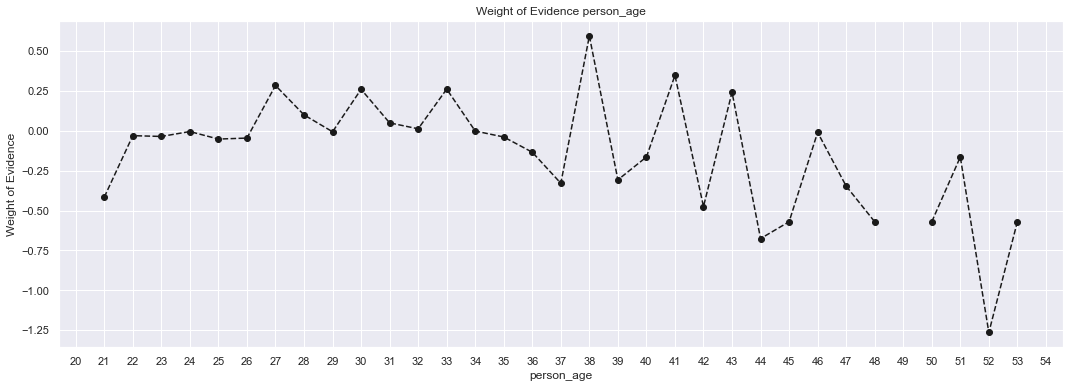

In [160]:
plot_by_woe(df)

In [161]:
# 'person_age:>37'

In [162]:
X_prep_temp = X_prep[X_prep['person_age']<=37]

In [163]:
df = woe_continuous(X_prep_temp, 'person_age', y_prep[X_prep_temp.index])

In [164]:
df

,person_age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,20,1,1.000000,0.000332,1.0,0.0,0.000425,0.000000,inf,NaN,NaN,inf
1,21,120,0.700000,0.039801,84.0,36.0,0.035729,0.054217,-0.417016,0.300000,inf,inf
2,22,341,0.774194,0.113101,264.0,77.0,0.112293,0.115964,-0.032170,0.074194,0.384846,inf
3,23,375,0.773333,0.124378,290.0,85.0,0.123352,0.128012,-0.037084,0.000860,0.004914,inf
4,24,375,0.778667,0.124378,292.0,83.0,0.124202,0.125000,-0.006401,0.005333,0.030684,inf
5,25,318,0.770440,0.105473,245.0,73.0,0.104211,0.109940,-0.053515,0.008226,0.047114,inf
6,26,232,0.771552,0.076949,179.0,53.0,0.076138,0.079819,-0.047220,0.001111,0.006295,inf
7,27,205,0.824390,0.067993,169.0,36.0,0.071884,0.054217,0.282066,0.052839,0.329286,inf
8,28,206,0.796117,0.068325,164.0,42.0,0.069758,0.063253,0.097883,0.028274,0.184183,inf
9,29,167,0.778443,0.055390,130.0,37.0,0.055296,0.055723,-0.007697,0.017673,0.105580,inf


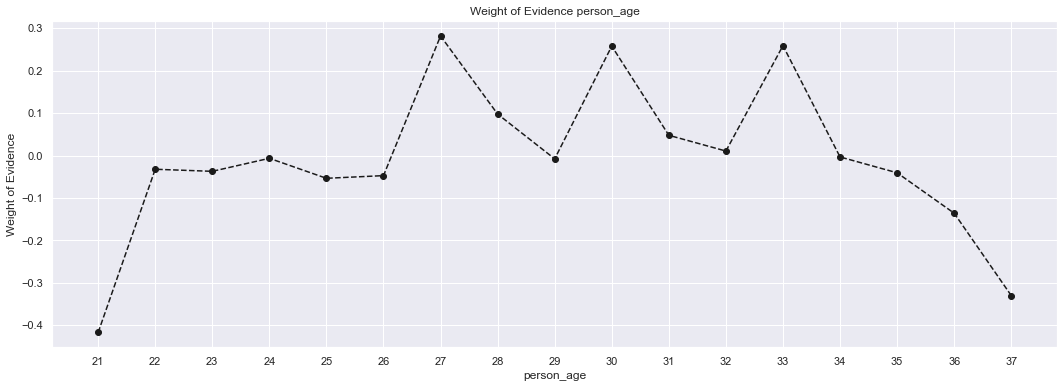

In [165]:
plot_by_woe(df)

In [166]:
# 'person_age:<=22', 'person_age:23-28', 'person_age:29-32', 'person_age:33-37',  'person_age:>=38'

X_prep['person_age:<=22'] = np.where((X_prep['person_age']<=22), 1, 0)

X_prep['person_age:23-28'] = np.where((X_prep['person_age']>=23) & (X_prep['person_age']<=28), 1, 0)

X_prep['person_age:29-33'] = np.where((X_prep['person_age']>=29) & (X_prep['person_age']<=32), 1, 0)

X_prep['person_age:34-37'] = np.where((X_prep['person_age']>=33) & (X_prep['person_age']<=37), 1, 0)

X_prep['person_age:>=38'] = np.where((X_prep['person_age']>=38), 1, 0)

'person_income'

In [167]:
X_prep['person_income'].nunique()

861

In [168]:
X_prep['person_income_factor'] = pd.cut(X_prep['person_income'], 50)

In [169]:
df = woe_continuous(X_prep, 'person_income_factor', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [170]:
df

,person_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(2904.8, 42704.0]",1023,0.623656,0.313996,638.0,385.0,0.251181,0.536212,-0.758355,NaN,NaN,inf
1,"(42704.0, 80608.0]",1463,0.820916,0.449048,1201.0,262.0,0.472835,0.364903,0.259116,0.197260,1.017470,inf
2,"(80608.0, 118512.0]",496,0.913306,0.152241,453.0,43.0,0.178346,0.059889,1.091242,0.092391,0.832127,inf
3,"(118512.0, 156416.0]",180,0.911111,0.055249,164.0,16.0,0.064567,0.022284,1.063828,0.002195,0.027414,inf
4,"(156416.0, 194320.0]",41,0.902439,0.012584,37.0,4.0,0.014567,0.005571,0.961174,0.008672,0.102654,inf
5,"(194320.0, 232224.0]",23,0.956522,0.007060,22.0,1.0,0.008661,0.001393,1.827593,0.054083,0.866419,inf
6,"(232224.0, 270128.0]",14,0.714286,0.004297,10.0,4.0,0.003937,0.005571,-0.347159,0.242236,2.174752,inf
7,"(270128.0, 308032.0]",7,1.000000,0.002149,7.0,0.0,0.002756,0.000000,inf,0.285714,inf,inf
8,"(308032.0, 345936.0]",3,0.333333,0.000921,1.0,2.0,0.000394,0.002786,-1.956597,0.666667,inf,inf
9,"(345936.0, 383840.0]",2,1.000000,0.000614,2.0,0.0,0.000787,0.000000,inf,0.666667,inf,inf


In [171]:
# 'person_income:>120K'
X_prep_temp = X_prep[X_prep['person_income']<120000]

In [172]:
X_prep_temp['person_income_factor'] = pd.cut(X_prep_temp['person_income'], 50)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [173]:
df = woe_continuous(X_prep_temp, 'person_income_factor', y_prep[X_prep_temp.index])

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [174]:
df

,person_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4685.304, 7093.92]",4,0.000000,0.001340,0.0,4.0,0.000000,0.005797,-inf,NaN,NaN,inf
1,"(7093.92, 9387.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(9387.84, 11681.76]",9,0.222222,0.003016,2.0,7.0,0.000872,0.010145,-2.454124,NaN,NaN,inf
3,"(11681.76, 13975.68]",15,0.133333,0.005027,2.0,13.0,0.000872,0.018841,-3.073163,0.088889,0.619039,inf
4,"(13975.68, 16269.6]",23,0.217391,0.007708,5.0,18.0,0.002180,0.026087,-2.482295,0.084058,0.590868,inf
5,"(16269.6, 18563.52]",33,0.212121,0.011059,7.0,26.0,0.003051,0.037681,-2.513547,0.005270,0.031253,inf
6,"(18563.52, 20857.44]",42,0.428571,0.014075,18.0,24.0,0.007847,0.034783,-1.489043,0.216450,1.024504,inf
7,"(20857.44, 23151.36]",40,0.675000,0.013405,27.0,13.0,0.011770,0.018841,-0.470473,0.246429,1.018570,inf
8,"(23151.36, 25445.28]",87,0.655172,0.029155,57.0,30.0,0.024847,0.043478,-0.559507,0.019828,0.089034,inf
9,"(25445.28, 27739.2]",55,0.654545,0.018432,36.0,19.0,0.015693,0.027536,-0.562281,0.000627,0.002774,inf


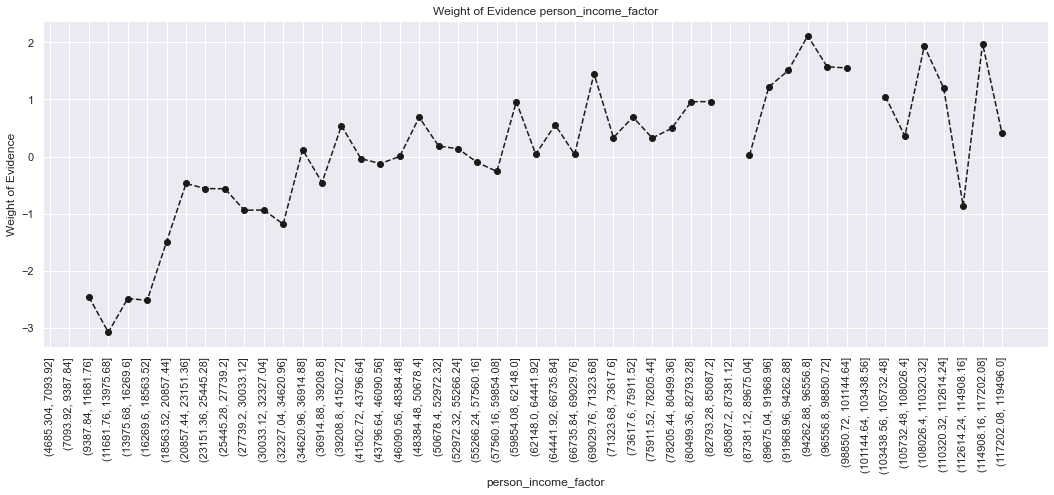

In [175]:
plot_by_woe(df, 90)

In [176]:
# 'person_income:<=20K', 'person_income:20K-34K',  'person_income:34K-52.5K', 'person_income:52.5K-66.5K', 'person_income:66.5K-75.7K',  'person_income:>75.7K',

X_prep['person_income:<=20K'] = np.where((X_prep['person_age']<=20000), 1, 0)

X_prep['person_income:20K-34K'] = np.where((X_prep['person_income']>20000) & (X_prep['person_age']<=34000), 1, 0)

X_prep['person_income:34K-52.5K'] = np.where((X_prep['person_income']>34000) & (X_prep['person_age']<=52500), 1, 0)

X_prep['person_income:52.5K-66.5K'] = np.where((X_prep['person_income']>52500) & (X_prep['person_age']<=66500), 1, 0)

X_prep['person_income:66.5K-75.7K'] = np.where((X_prep['person_income']>66500) & (X_prep['person_age']<=75700), 1, 0)

X_prep['person_income:>75.7K'] = np.where((X_prep['person_income']>75700), 1, 0)

'person_emp_length'

In [177]:
X_prep['person_emp_length'].unique()

array([ 6., 10.,  2.,  9.,  5.,  8.,  3., 17.,  0.,  7., 11.,  1., 13.,
        4., 12., 16., 18., 24., 21., 15., 14., 25., 19., 27., 20., 22.,
       23.])

In [178]:
df = woe_continuous(X_prep, 'person_emp_length', y_prep)

In [179]:
df

,person_emp_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,491,0.704684,0.150706,346.0,145.0,0.136220,0.201950,-0.393745,NaN,NaN,inf
1,1.0,274,0.733577,0.084101,201.0,73.0,0.079134,0.101671,-0.250604,0.028892,0.143140,inf
2,2.0,414,0.731884,0.127072,303.0,111.0,0.119291,0.154596,-0.259247,0.001693,0.008643,inf
3,3.0,333,0.780781,0.102210,260.0,73.0,0.102362,0.101671,0.006772,0.048897,0.266020,inf
4,4.0,303,0.818482,0.093002,248.0,55.0,0.097638,0.076602,0.242646,0.037701,0.235873,inf
5,5.0,287,0.811847,0.088091,233.0,54.0,0.091732,0.075209,0.198605,0.006635,0.044041,inf
6,6.0,270,0.803704,0.082873,217.0,53.0,0.085433,0.073816,0.146156,0.008143,0.052449,inf
7,7.0,214,0.813084,0.065684,174.0,40.0,0.068504,0.055710,0.206726,0.009380,0.060570,inf
8,8.0,191,0.827225,0.058625,158.0,33.0,0.062205,0.045961,0.302638,0.014141,0.095912,inf
9,9.0,133,0.781955,0.040823,104.0,29.0,0.040945,0.040390,0.013645,0.045270,0.288992,inf


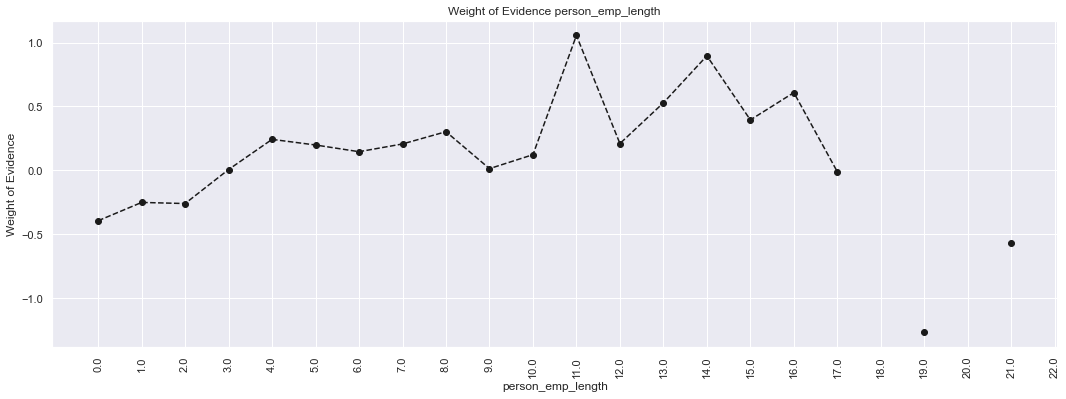

In [180]:
plot_by_woe(df,90)

In [181]:
# 'person_emp_length:<=2', 'person_emp_length:3-7', 'person_emp_length:8-10', 'person_emp_length:>10',



In [182]:
X_prep['person_emp_length:<=2'] = np.where((X_prep['person_emp_length']<=2), 1, 0)

X_prep['person_emp_length:3-7'] = np.where((X_prep['person_emp_length']>2) & (X_prep['person_emp_length']<=7), 1, 0)

X_prep['person_emp_length:8-10'] = np.where((X_prep['person_emp_length']>7) & (X_prep['person_emp_length']<=10), 1, 0)

X_prep['person_emp_length:>10'] = np.where((X_prep['person_emp_length']>10), 1, 0)

'loan_amnt'

In [183]:
X_prep['loan_amnt'].nunique()

315

In [184]:
X_prep['loan_amnt_factor'] = pd.cut(X_prep['loan_amnt'], 50)

In [185]:
df = woe_continuous(X_prep, 'loan_amnt_factor', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [186]:
df

,loan_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",31,0.838710,0.009515,26.0,5.0,0.010236,0.006964,0.385209,NaN,NaN,inf
1,"(1190.0, 1880.0]",100,0.740000,0.030694,74.0,26.0,0.029134,0.036212,-0.217481,0.098710,0.602690,inf
2,"(1880.0, 2570.0]",131,0.832061,0.040209,109.0,22.0,0.042913,0.030641,0.336856,0.092061,0.554337,inf
3,"(2570.0, 3260.0]",169,0.686391,0.051872,116.0,53.0,0.045669,0.073816,-0.480152,0.145671,0.817007,inf
4,"(3260.0, 3950.0]",75,0.840000,0.023020,63.0,12.0,0.024803,0.016713,0.394778,0.153609,0.874930,inf
5,"(3950.0, 4640.0]",179,0.810056,0.054942,145.0,34.0,0.057087,0.047354,0.186923,0.029944,0.207855,inf
6,"(4640.0, 5330.0]",279,0.817204,0.085635,228.0,51.0,0.089764,0.071031,0.234070,0.007148,0.047147,inf
7,"(5330.0, 6020.0]",247,0.825911,0.075813,204.0,43.0,0.080315,0.059889,0.293470,0.008707,0.059400,inf
8,"(6020.0, 6710.0]",85,0.823529,0.026090,70.0,15.0,0.027559,0.020891,0.276995,0.002382,0.016475,inf
9,"(6710.0, 7400.0]",162,0.888889,0.049724,144.0,18.0,0.056693,0.025070,0.815992,0.065359,0.538997,inf


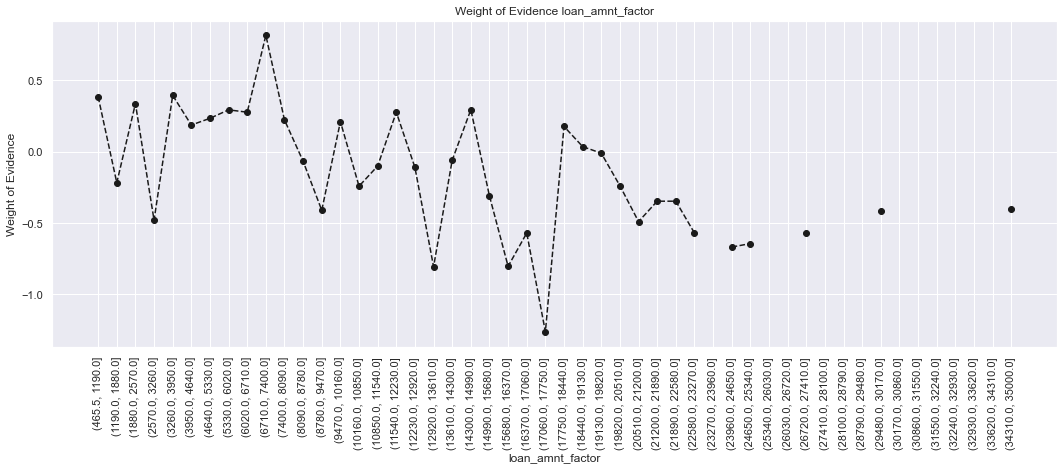

In [187]:
plot_by_woe(df,90)

In [188]:
# 'loan_amnt:<=3260', 'loan_amnt:3260-8090', 'loan_amnt:8090-12230', 'loan_amnt:12230-18440',  'loan_amnt:>18440',

X_prep['loan_amnt:<=3260'] = np.where((X_prep['loan_amnt']<=3260), 1, 0)

X_prep['loan_amnt:3260-8090'] = np.where((X_prep['loan_amnt']>3260) & (X_prep['loan_amnt']<=8090), 1, 0)

X_prep['loan_amnt:8090-12230'] = np.where((X_prep['loan_amnt']>8090) & (X_prep['loan_amnt']<=12230), 1, 0)

X_prep['loan_amnt:12230-18440'] = np.where((X_prep['loan_amnt']>12230) & (X_prep['loan_amnt']<=18440), 1, 0)

X_prep['loan_amnt:>18440'] = np.where((X_prep['loan_amnt']>18440), 1, 0)

'loan_int_rate',

In [189]:
X_prep['loan_int_rate'].nunique()

261

In [190]:
X_prep['loan_int_rate_factor'] = pd.cut(X_prep['loan_int_rate'], 50)

In [191]:
df = woe_continuous(X_prep, 'loan_int_rate_factor',y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [192]:
df

,loan_int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.404, 5.746]",50,0.980000,0.015347,49.0,1.0,0.019291,0.001393,2.628371,NaN,NaN,inf
1,"(5.746, 6.073]",118,0.932203,0.036219,110.0,8.0,0.043307,0.011142,1.357589,0.047797,1.270781,inf
2,"(6.073, 6.399]",34,0.970588,0.010436,33.0,1.0,0.012992,0.001393,2.233058,0.038385,0.875469,inf
3,"(6.399, 6.726]",68,0.823529,0.020872,56.0,12.0,0.022047,0.016713,0.276995,0.147059,1.956063,inf
4,"(6.726, 7.052]",72,0.972222,0.022099,70.0,2.0,0.027559,0.002786,2.291898,0.148693,2.014903,inf
5,"(7.052, 7.378]",74,0.918919,0.022713,68.0,6.0,0.026772,0.008357,1.164298,0.053303,1.127600,inf
6,"(7.378, 7.705]",188,0.914894,0.057704,172.0,16.0,0.067717,0.022284,1.111456,0.004025,0.052842,inf
7,"(7.705, 8.031]",156,0.884615,0.047882,138.0,18.0,0.054331,0.025070,0.773432,0.030278,0.338024,inf
8,"(8.031, 8.358]",2,1.000000,0.000614,2.0,0.0,0.000787,0.000000,inf,0.115385,inf,inf
9,"(8.358, 8.684]",75,0.893333,0.023020,67.0,8.0,0.026378,0.011142,0.861801,0.106667,inf,inf


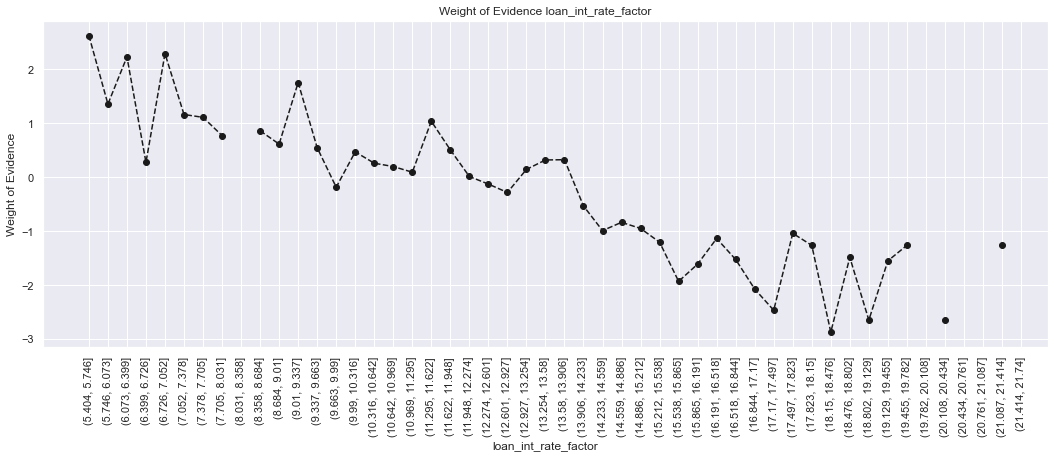

In [193]:
plot_by_woe(df,90)

In [194]:
# 'loan_int_rate:<=6.488', 'loan_int_rate:6.488-9.692', 'loan_int_rate:9.692-10.76', 'loan_int_rate:10.76-13.964', 'loan_int_rate:13.964-15.388', 'loan_int_rate:15.388-17.88', 'loan_int_rate:>17.88',

X_prep['loan_int_rate:<=6.488'] = np.where((X_prep['loan_int_rate']<=6.488), 1, 0)

X_prep['loan_int_rate:6.488-9.692'] = np.where((X_prep['loan_int_rate']>6.488) & (X_prep['loan_int_rate']<=9.692), 1, 0)

X_prep['loan_int_rate:9.692-10.76'] = np.where((X_prep['loan_int_rate']>9.692) & (X_prep['loan_int_rate']<=10.76), 1, 0)

X_prep['loan_int_rate:10.76-13.964'] = np.where((X_prep['loan_int_rate']>10.76) & (X_prep['loan_int_rate']<=13.964), 1, 0)

X_prep['loan_int_rate:13.964-15.388'] = np.where((X_prep['loan_int_rate']>13.964) & (X_prep['loan_int_rate']<=15.388), 1, 0)

X_prep['loan_int_rate:15.388-17.88'] = np.where((X_prep['loan_int_rate']>15.388) & (X_prep['loan_int_rate']<=17.88), 1, 0)

X_prep['loan_int_rate:>17.88'] = np.where((X_prep['loan_int_rate']>17.88), 1, 0)

'loan_percent_income', 

In [195]:
X_prep['loan_percent_income'].nunique()

66

In [196]:
X_prep['loan_percent_income_factor'] = pd.cut(X_prep['loan_percent_income'], 50)

In [197]:
df = woe_continuous(X_prep,'loan_percent_income_factor',y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [198]:
df

,loan_percent_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.00078, 0.0156]",12,1.000000,0.003683,12.0,0.0,0.004724,0.000000,inf,NaN,NaN,inf
1,"(0.0156, 0.0312]",98,0.887755,0.030080,87.0,11.0,0.034252,0.015320,0.804563,0.112245,inf,inf
2,"(0.0312, 0.0468]",108,0.861111,0.033149,93.0,15.0,0.036614,0.020891,0.561100,0.026644,0.243464,inf
3,"(0.0468, 0.0624]",276,0.891304,0.084715,246.0,30.0,0.096850,0.041783,0.840684,0.030193,0.279585,inf
4,"(0.0624, 0.078]",120,0.858333,0.036832,103.0,17.0,0.040551,0.023677,0.538066,0.032971,0.302619,inf
5,"(0.078, 0.0936]",276,0.836957,0.084715,231.0,45.0,0.090945,0.062674,0.372305,0.021377,0.165760,inf
6,"(0.0936, 0.109]",135,0.822222,0.041436,111.0,24.0,0.043701,0.033426,0.268027,0.014734,0.104279,inf
7,"(0.109, 0.125]",302,0.890728,0.092695,269.0,33.0,0.105906,0.045961,0.834754,0.068506,0.566727,inf
8,"(0.125, 0.14]",272,0.908088,0.083487,247.0,25.0,0.097244,0.034819,1.027063,0.017360,0.192309,inf
9,"(0.14, 0.156]",149,0.879195,0.045734,131.0,18.0,0.051575,0.025070,0.721376,0.028894,0.305687,inf


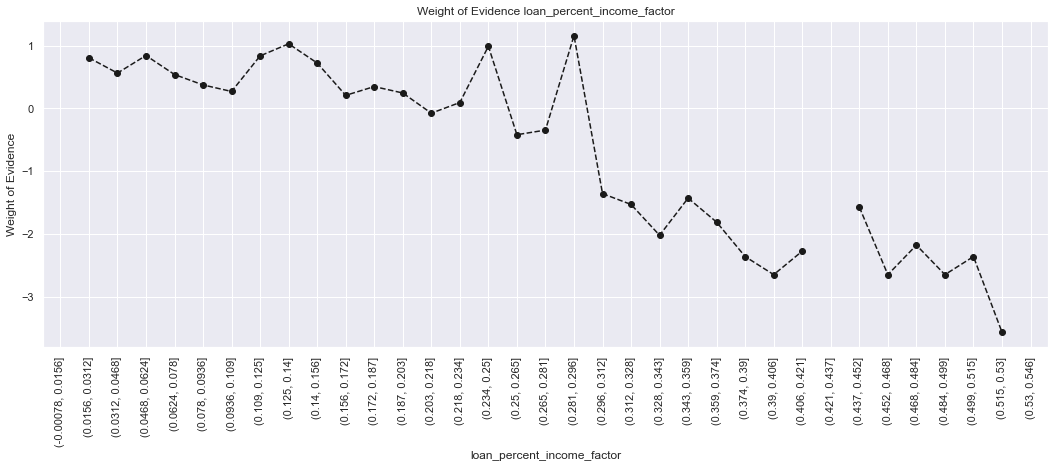

In [199]:
plot_by_woe(df,90)

In [200]:
# 'loan_percent_income:<=13.3pct', 'loan_percent_income:14.9-16.6pct', 'loan_percent_income:16.6-29.9pct', 'loan_percent_income:29.9-31.5pct', 'loan_percent_income:>31.5pct',

X_prep['loan_percent_income:<=13.3pct'] = np.where((X_prep['loan_percent_income']<=0.133), 1, 0)

X_prep['loan_percent_income:13.3-16.6pct'] = np.where((X_prep['loan_percent_income']>0.133) & (X_prep['loan_percent_income']<=0.166), 1, 0)

X_prep['loan_percent_income:16.6-29.9pct'] = np.where((X_prep['loan_percent_income']>0.166) & (X_prep['loan_percent_income']<=0.299), 1, 0)

X_prep['loan_percent_income:29.9-31.5pct'] = np.where((X_prep['loan_percent_income']>0.299) & (X_prep['loan_percent_income']<=0.315), 1, 0)

X_prep['loan_percent_income:>31.5pct'] = np.where((X_prep['loan_percent_income']>0.315), 1, 0)

'cb_person_cred_hist_length'

In [201]:
X_prep['cb_person_cred_hist_length'].unique()

array([ 2,  4,  6, 10,  3, 15,  5, 19,  8,  9, 20,  7, 13, 22, 11, 12, 14,
       16, 21, 28, 17, 30, 18, 25, 27, 24, 26], dtype=int64)

In [202]:
df = woe_continuous(X_prep,'cb_person_cred_hist_length',y_prep)

In [203]:
df

,cb_person_cred_hist_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,607,0.759473,0.186311,461.0,146.0,0.181496,0.203343,-0.113658,NaN,NaN,inf
1,3,600,0.760000,0.184162,456.0,144.0,0.179528,0.200557,-0.110770,0.000527,0.002888,inf
2,4,555,0.789189,0.170350,438.0,117.0,0.172441,0.162953,0.056595,0.029189,0.167365,inf
3,5,207,0.772947,0.063536,160.0,47.0,0.062992,0.065460,-0.038424,0.016242,0.095019,inf
4,6,188,0.835106,0.057704,157.0,31.0,0.061811,0.043175,0.358809,0.062160,0.397232,inf
5,7,213,0.812207,0.065378,173.0,40.0,0.068110,0.055710,0.200962,0.022900,0.157846,inf
6,8,182,0.802198,0.055862,146.0,36.0,0.057480,0.050139,0.136638,0.010009,0.064324,inf
7,9,191,0.780105,0.058625,149.0,42.0,0.058661,0.058496,0.002827,0.022093,0.133811,inf
8,10,188,0.792553,0.057704,149.0,39.0,0.058661,0.054318,0.076935,0.012448,0.074108,inf
9,11,47,0.808511,0.014426,38.0,9.0,0.014961,0.012535,0.176912,0.015957,0.099977,inf


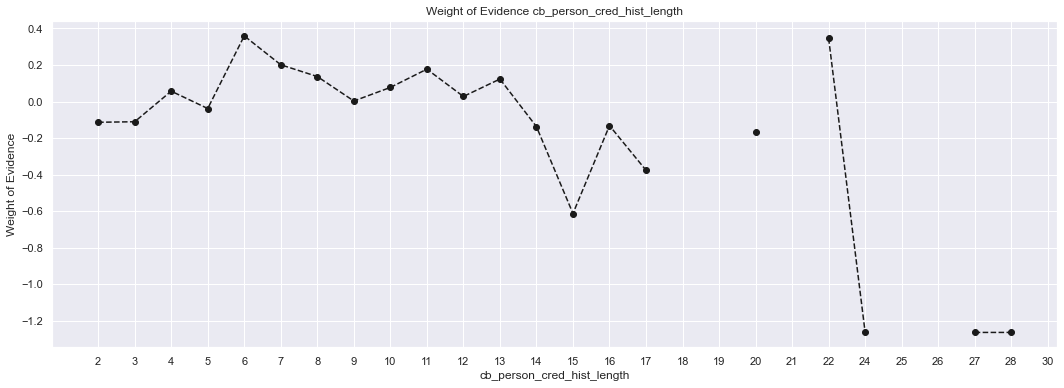

In [204]:
plot_by_woe(df)

In [205]:
# 'cb_person_cred_hist_length', discard

In [206]:
X_prep.shape

(3258, 68)

### If errors were encountered, then the new data may have some categories missing. Then adjust and delete missing categories accordingly.

In [207]:
X_new = X_prep

In [208]:
X_new.shape

(3258, 68)

In [210]:
y_new = y_test.copy()

In [211]:
y_new.shape

(3258,)

In [212]:
X_new.to_csv('inputs_new.csv')
y_new.to_csv('targets_new.csv')

### Finished new data preprocessing. Now move on to PSI calculation

In [213]:
inputs_train_ref = pd.read_csv('inputs_train_with_ref.csv', index_col=0)

In [ ]:
inputs_new_ref = credit_data

categories:
    
'person_home_ownership:OWN', 
'person_home_ownership:MORTGAGE', 
'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y', 
'cb_person_default_on_file:N',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age:<=22', 
'person_age:23-28', 
'person_age:29-33', 
'person_age:34-37',  
'person_age:>=38',
'person_income:<=20K', 
'person_income:20K-34K',  
'person_income:34K-52.5K', 
'person_income:52.5K-66.5K', 
'person_income:66.5K-75.7K',  
'person_income:>75.7K',
'person_emp_length:<=2', 
'person_emp_length:3-7', 
'person_emp_length:8-10', 
'person_emp_length:>10',
'loan_amnt:<=3260', 
'loan_amnt:3260-8090', 
'loan_amnt:8090-12230', 
'loan_amnt:12230-18440',  
'loan_amnt:>18440',
'loan_int_rate:<=6.488', 
'loan_int_rate:6.488-9.692', 
'loan_int_rate:9.692-10.76', 
'loan_int_rate:10.76-13.964', 
'loan_int_rate:13.964-15.388', 
'loan_int_rate:15.388-17.88', 
'loan_int_rate:>17.88',
'loan_percent_income:<=13.3pct', 
'loan_percent_income:13.3-16.6pct', 
'loan_percent_income:16.6-29.9pct', 
'loan_percent_income:29.9-31.5pct', 
'loan_percent_income:>31.5pct',


reference categories:

'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'person_age:<=22',
'person_income:<=20K',
'person_emp_length:<=2',
'loan_amnt:>18440',
'loan_int_rate:>17.88',
'loan_percent_income:>31.5pct',
